In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler

In [2]:
#1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
iris = load_iris()

In [3]:
#2.Оставьте два признака - sepal_length и sepal_width и целевую переменную
data_intermediate = pd.DataFrame(iris.data,columns=iris.feature_names)
data = data_intermediate[['sepal length (cm)','sepal width (cm)']]
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
#3.Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3)

In [5]:
#4.Постройте модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,2,2
2,2,2
3,1,2
4,0,0
5,2,1
6,1,1
7,0,0
8,1,1
9,2,2


In [6]:
#5.Визуализируйте предсказания для тестовой выборки и центры классов
#(разделяющую плоскость можно не строить, но обратите внимание, что класса 3)
from sklearn.metrics import accuracy_score

In [7]:
accuracy_score(y_test, lda.predict(X_test))

0.7777777777777778

In [8]:
lda.coef_

array([[-5.98064611,  7.50965729],
       [ 1.61155155, -3.34641342],
       [ 4.96981617, -4.61883717]])

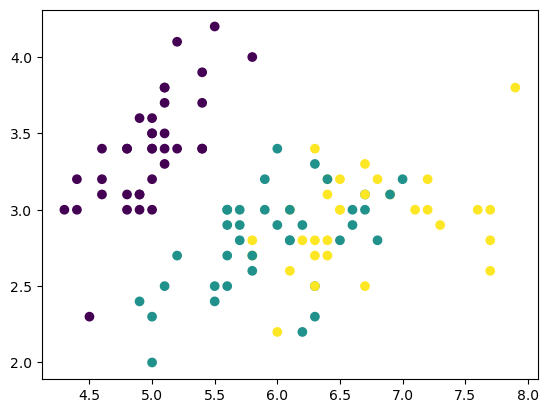

In [9]:
#6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]
X_train[['sepal length (cm)', 'sepal width (cm)']]
plt.scatter(x=small_train['sepal length (cm)'], y=small_train['sepal width (cm)'], c=y_train)
plt.show()

In [10]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)
lda_small.means_

array([[4.975     , 3.39166667],
       [5.96052632, 2.79736842],
       [6.69354839, 2.93548387]])

C:\Users\koves\AppData\Local\Temp\ipykernel_33788\3131974687.py:6: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)
C:\Users\koves\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


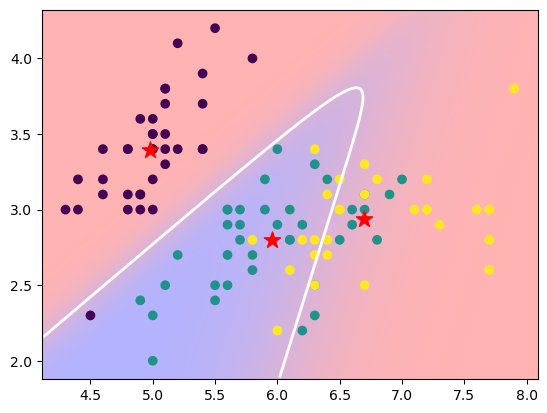

In [11]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
plt.show()
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=y_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

C:\Users\koves\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


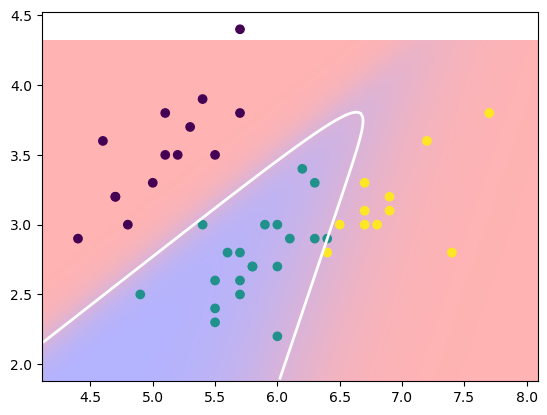

In [12]:
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=lda_small.predict(small_test))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')
plt.show()

In [13]:
lda_small.coef_

array([[-5.98064611,  7.50965729],
       [ 1.61155155, -3.34641342],
       [ 4.96981617, -4.61883717]])

In [14]:
accuracy_score(y_test, lda_small.predict(small_test))

0.7777777777777778

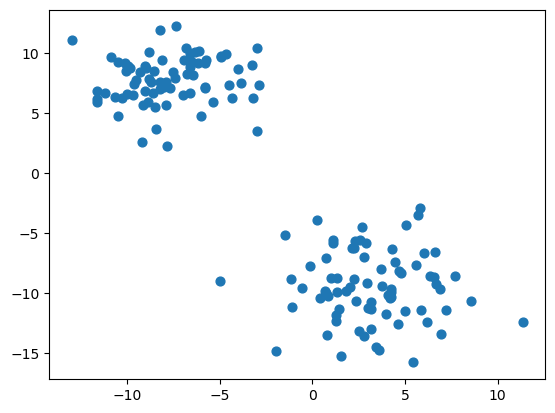

In [15]:
#7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=2, cluster_std=2.5)
plt.scatter(X[:, 0], X[:, 1], s=40)

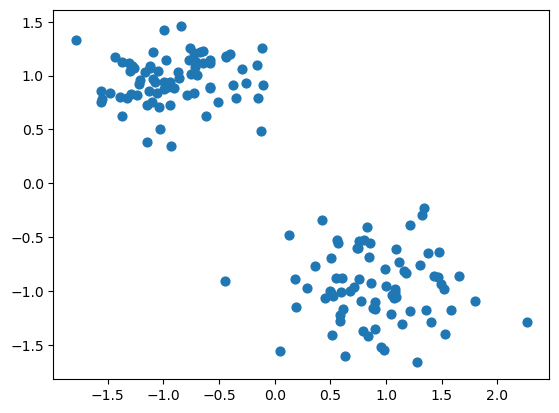

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled
X_scaled = scaler.fit_transform(X)
X_scaled
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=40)

C:\Users\koves\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\koves\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


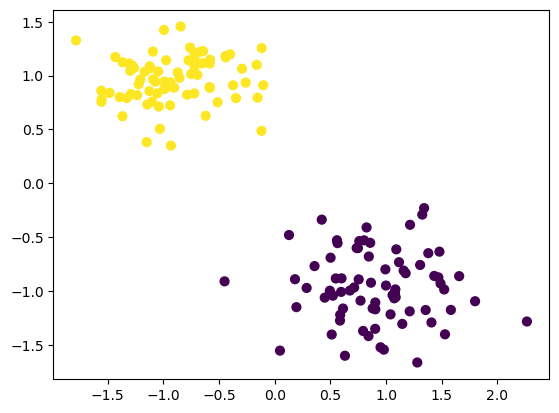

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=40)